## Лабораторная работа №1
по дисциплине *Data Mining и исследование данных*

Вариант 4

Работа выполнена **Воропаевым В.C.**, гр. **М1О-415Бки-19**

Цель лабораторной работы: рассмотреть данные, содержащие оценку качества вина и объективные показатели этого вина. 

In [48]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

red_dataset = pd.read_csv('datasets/winequality-white.csv', sep=';')    #Загрузка датасета с параметрами красного вина
white_dataset = pd.read_csv('datasets/winequality-red.csv', sep=';')    #Загрузка датасета с параметрами белого вина
red_dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [49]:
white_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Рассмотрим зависимость качества вина от его параметров. Удобнее всего в данном случае это сделать с помощью двумерной гистограммы.

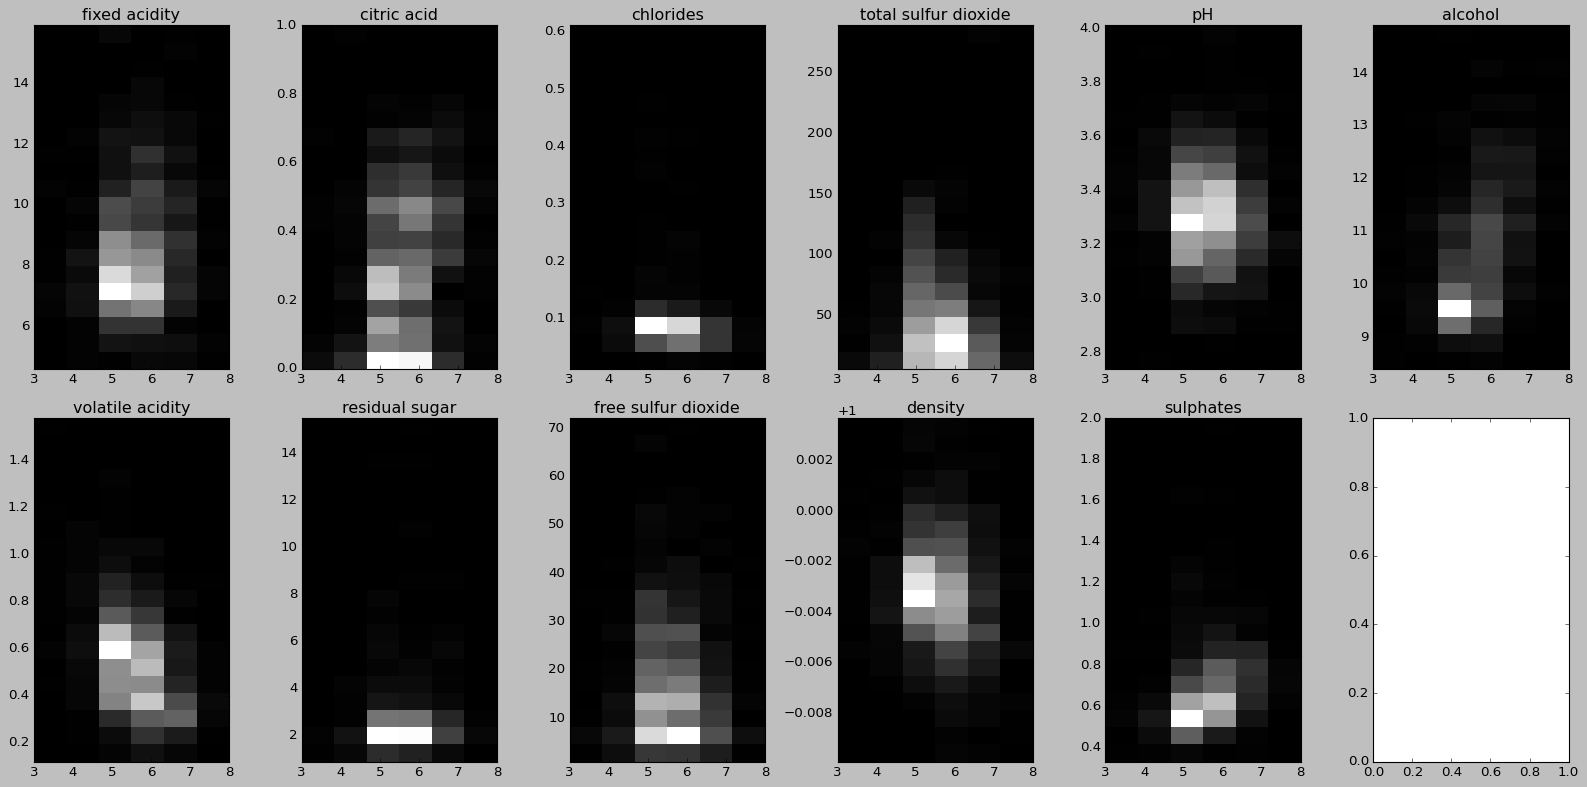

In [50]:
%matplotlib inline
plt.style.use('fast')
fig, axs = plt.subplots(2, 6, figsize=(20,10))

for i in range(11):
    x = i % 2
    y = i // 2
    column = white_dataset.columns[i]
    max_p = max(white_dataset[column])
    min_p = min(white_dataset[column])
    axs[x, y].hist2d(white_dataset['quality'], white_dataset[column], 
        bins = [6, 20], range = [[3, 8],[min_p, max_p]], density = True)
    axs[x, y].set_title(column)
fig.tight_layout()
plt.show()

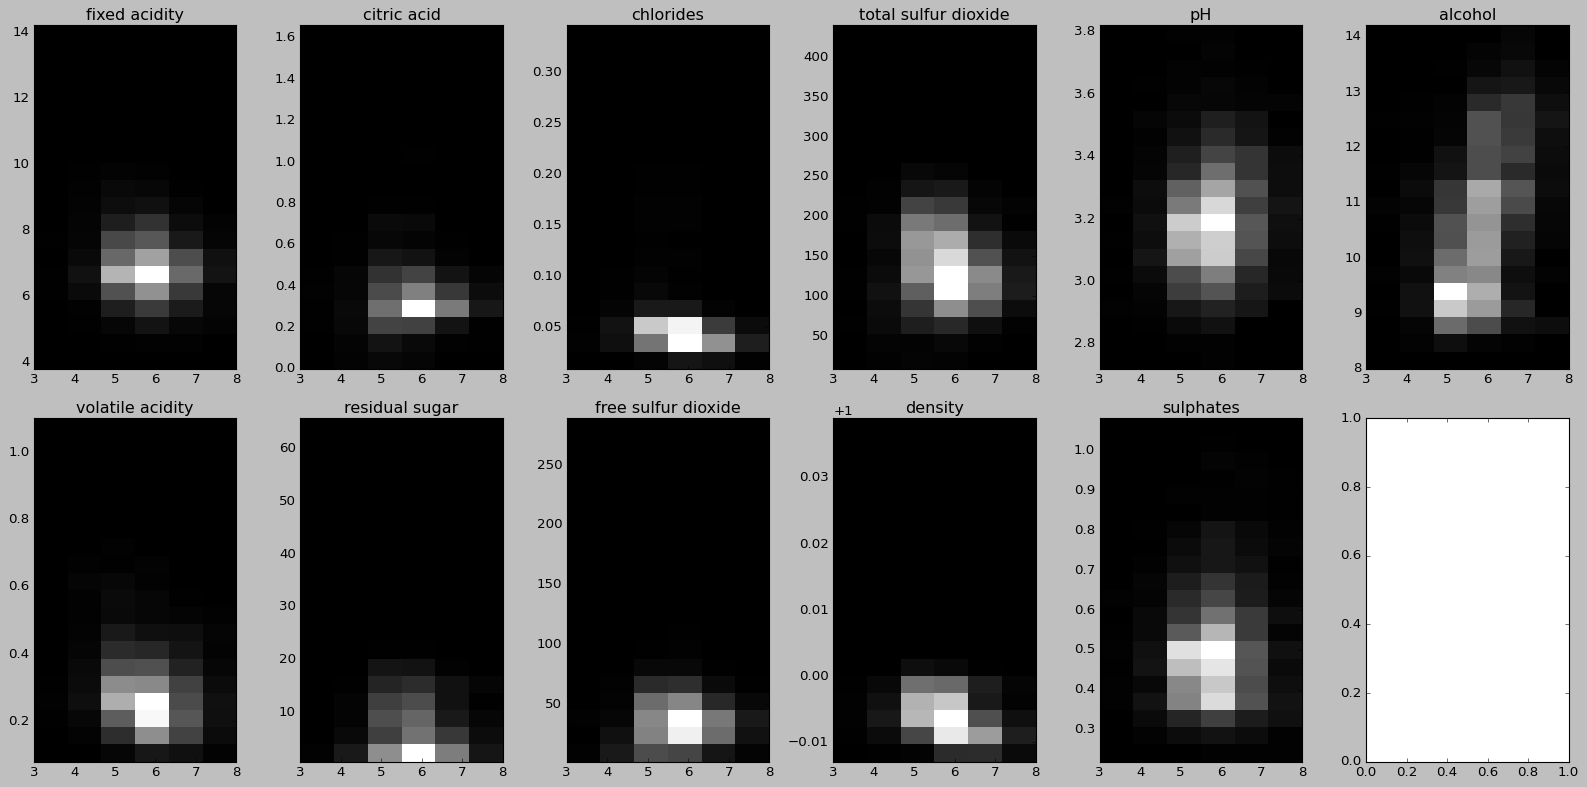

In [51]:
%matplotlib inline
plt.style.use('fast')
fig, axs = plt.subplots(2, 6, figsize=(20,10))

for i in range(11):
    x = i % 2
    y = i // 2
    column = red_dataset.columns[i]
    max_p = max(red_dataset[column])
    min_p = min(red_dataset[column])
    axs[x, y].hist2d(red_dataset['quality'], red_dataset[column], 
        bins = [6, 20], range = [[3, 8],[min_p, max_p]], density = True)
    axs[x, y].set_title(column)
fig.tight_layout()
plt.show()

На основании этих гистограмм можно сделать некоторые предварительные выводы:
 - более высокому качеству вина в среднем соответствует более низкая плотность
 - высокая концентрация сульфатов в среднем соответствует более высокому качеству вина
 - летучая кислотность в основном ниже у высококачественных вин
 - концентрация лимонной кислоты выше у высококачественных вин
 - в среднем концентрация алкоголя выше у качественных вин

Рассчитаем матрицу корреляции - на её основании можно сделать вывод о наиболее и наименее значимых для результата параметров:

In [52]:
white_corr_matrix = white_dataset.corr()
white_corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [53]:
red_corr_matrix = red_dataset.corr()
red_corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Как можно заметить, на качество красных и белых вин параметры влияют в различной степени.

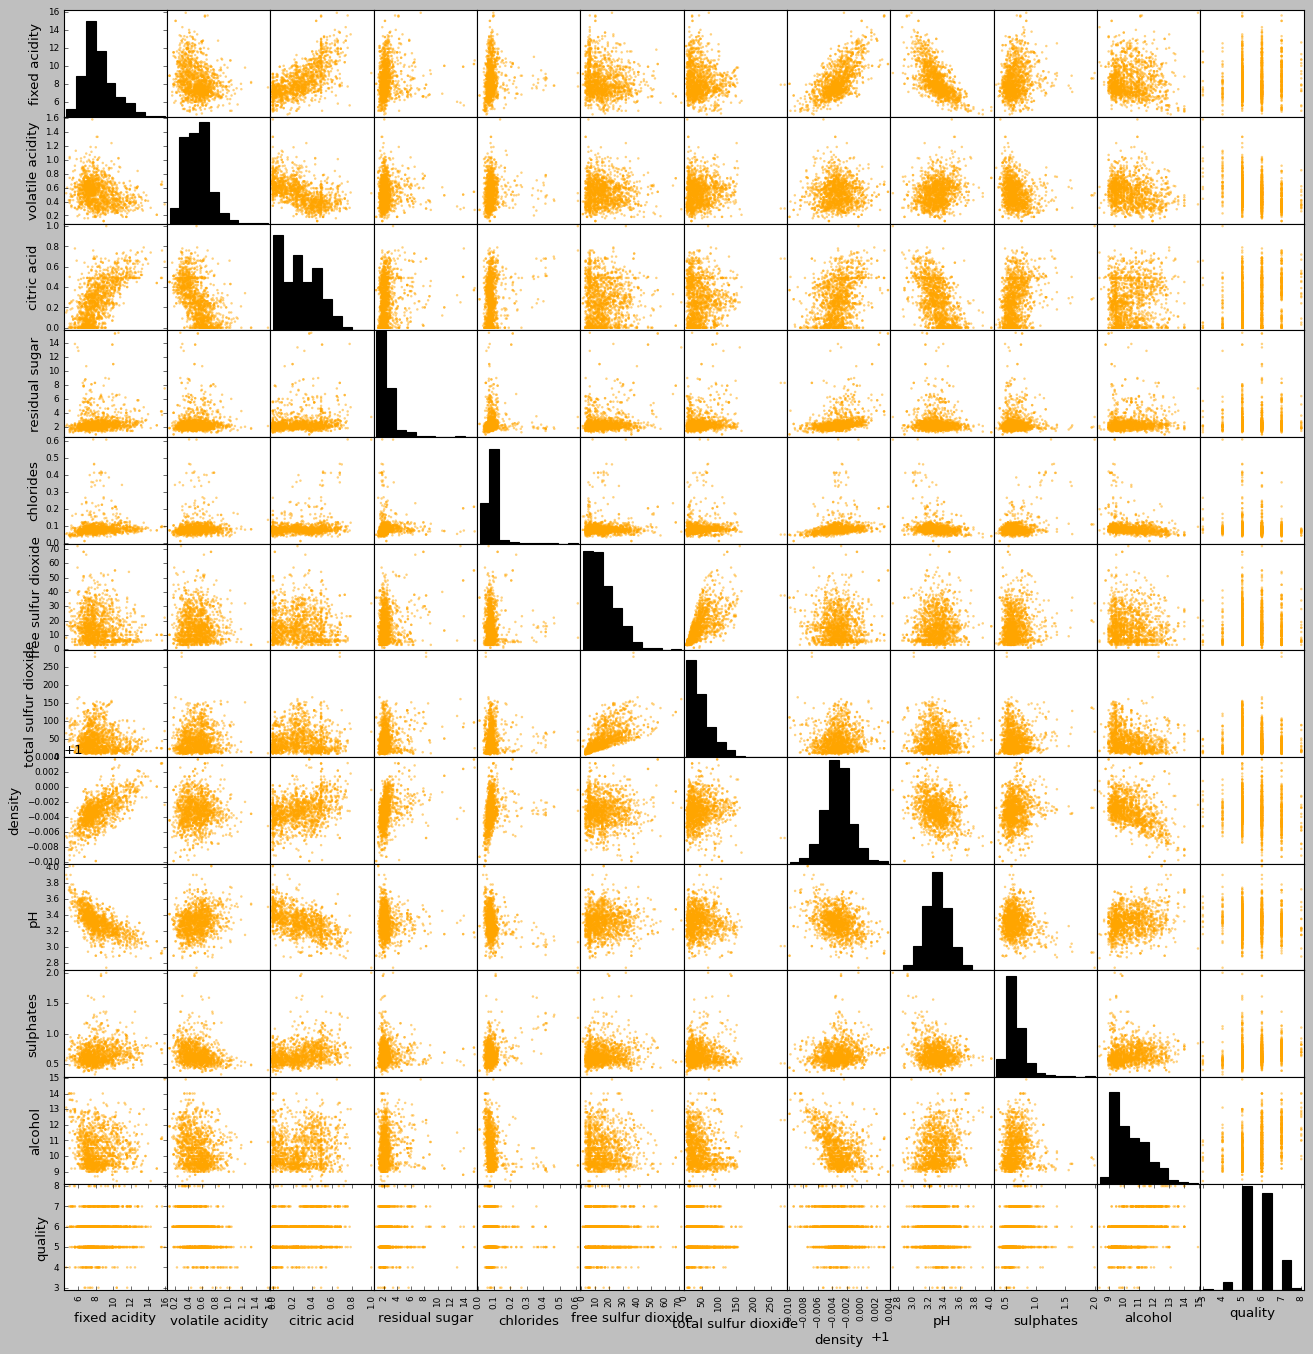

In [54]:
from pandas.plotting import scatter_matrix
scatter_matrix(white_dataset,figsize=(20,20),color='orange')
plt.show()

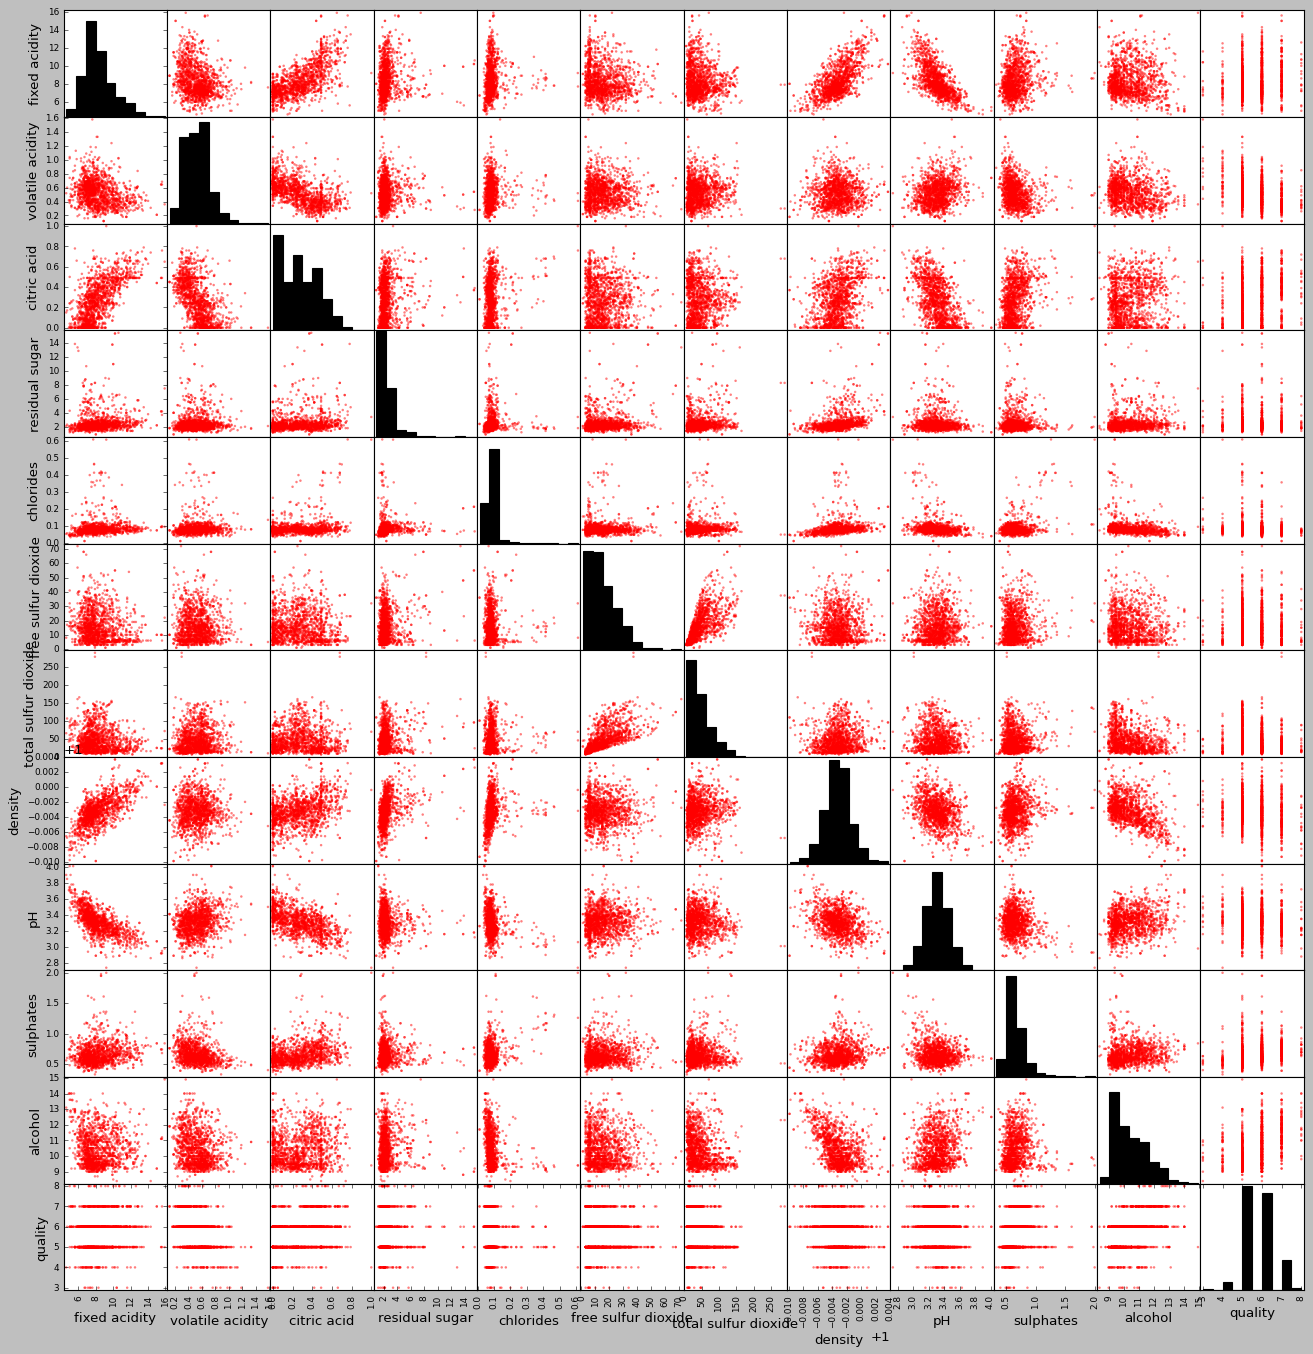

In [55]:
scatter_matrix(white_dataset,figsize=(20,20),color='red')
plt.show()

В итоге можно сделать следующие выводы:
 - у распределения данных не видно каких-либо артифактов, но видны относительно четкие зависимости
 - параметры по одиночке не слишком сильно коррелируют с результатом - коэф-т не превышает 0.5
 - размеры датасетов достаточные для построения относительно точной модели

В итоге можно сказать, что на основании данных параметров можно построить достаточно точную модель, определяющую качество вина по его параметрам.